ImageView object:
  Display bands       :  [0, 3, 6]
  Interpolation       :  <default>
  RGB data limits     :
    R: [7597.0, 21747.0]
    G: [7944.0, 15657.0]
    B: [7238.0, 12511.0]

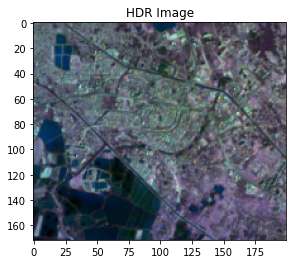

In [18]:
import spectral
from spectral import io
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Load the image
img = io.envi.open('subset3.hdr')



# Customize the display with additional parameters
spectral.imshow(img, cmap='gray', title='HDR Image')

In [19]:

band7 = img[:, :, 6].astype(float)
band6 = img[:, :, 5].astype(float)
band5 = img[:, :, 4].astype(float) 
band4 = img[:, :, 3].astype(float) 
band3 = img[:, :,2].astype(float)
band2 = img[:, :,1].astype(float)
band1 = img[:, :,0].astype(float)



ndvi = (band4 - band3) / (band4 + band3)

# Calculate NDWI
ndwi = (band4 - band5) / (band5 + band4)

# Calculate NDBI
ndbi = (band5 - band4) / (band4 + band5)

MNDWI =(band2 - band5) / (band2 + band5)





# # Calculate NDVI
# ndvi = (nir - red) / (nir + red)

# # Calculate NDWI
# ndwi = (green - nir) / (green + nir)

# # Calculate NDBI
# ndbi = (swir1 - nir) / (swir1 + nir)
# ndvi = (band3 - band4) / (band5 + band4)

# # Calculate NDWI
# ndwi = (band5 - band6) / (band5 + band6)

# # Calculate NDBI
# ndbi = (band6 - band5) / (band6 + band5)





In [20]:
import numpy as np
ndvi_count = np.count_nonzero(ndvi>0)
ndwi_count = np.count_nonzero(ndwi>0.03)
ndbi_count = np.count_nonzero(ndbi>0)
MNDWI_countB = np.count_nonzero((MNDWI > 0) & (MNDWI <= 0.2))
MNDWI_countV = np.count_nonzero(MNDWI >= 0.23)
MNDWI_countw = np.count_nonzero(MNDWI <-0.1)






print('Number of non-zero values in NDVI:', ndvi_count)
print('Number of non-zero values in NDWI:', ndwi_count)
print('Number of non-zero values in NDBI:', ndbi_count)#2023
print('Number of non-zero values in Build:', MNDWI_countB)
print('Number of non-zero values in veg:', MNDWI_countV)
print('Number of non-zero values in water:', MNDWI_countw)





Number of non-zero values in NDVI: 803
Number of non-zero values in NDWI: 464
Number of non-zero values in NDBI: 15121
Number of non-zero values in Build: 27530
Number of non-zero values in veg: 608
Number of non-zero values in water: 360


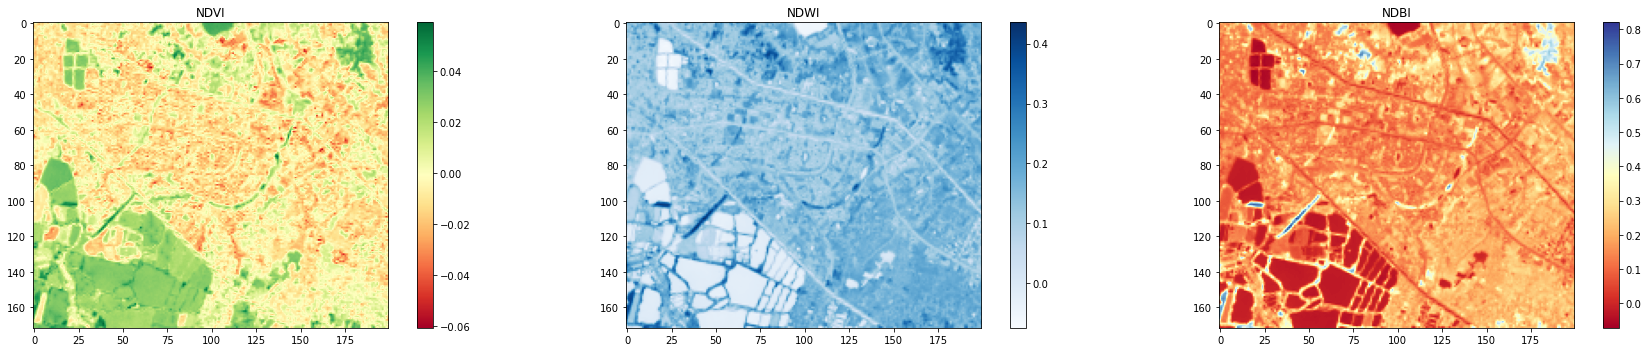

In [3]:
import spectral
from spectral import io
import matplotlib.pyplot as plt
import numpy as np

# Load the HDR image
img = io.envi.open('subset3.hdr')

# Extract the necessary bands from the image
red = img[:, :, 3].astype(float)
nir = img[:, :, 4].astype(float)
swir1 = img[:, :, 5].astype(float)
green = img[:, :, 2].astype(float)

# Calculate NDVI
ndvi = (nir - red) / (nir + red)

# Calculate NDWI
ndwi = (green - nir) / (green + nir)

# Calculate NDBI
ndbi = (green - nir) / (swir1 + nir)

# Set the desired figure size
fig_size = (25, 5)

# Display the images
plt.figure(figsize=fig_size)

# NDVI
plt.subplot(1, 3, 1)
plt.imshow(ndvi, cmap='RdYlGn')
plt.title('NDVI')
plt.colorbar()

# NDWI
plt.subplot(1, 3, 2)
plt.imshow(ndwi, cmap='Blues')
plt.title('NDWI')
plt.colorbar()

# NDBI
plt.subplot(1, 3, 3)
plt.imshow(ndbi, cmap='RdYlBu')
plt.title('NDBI')
plt.colorbar()

plt.tight_layout()
plt.show()


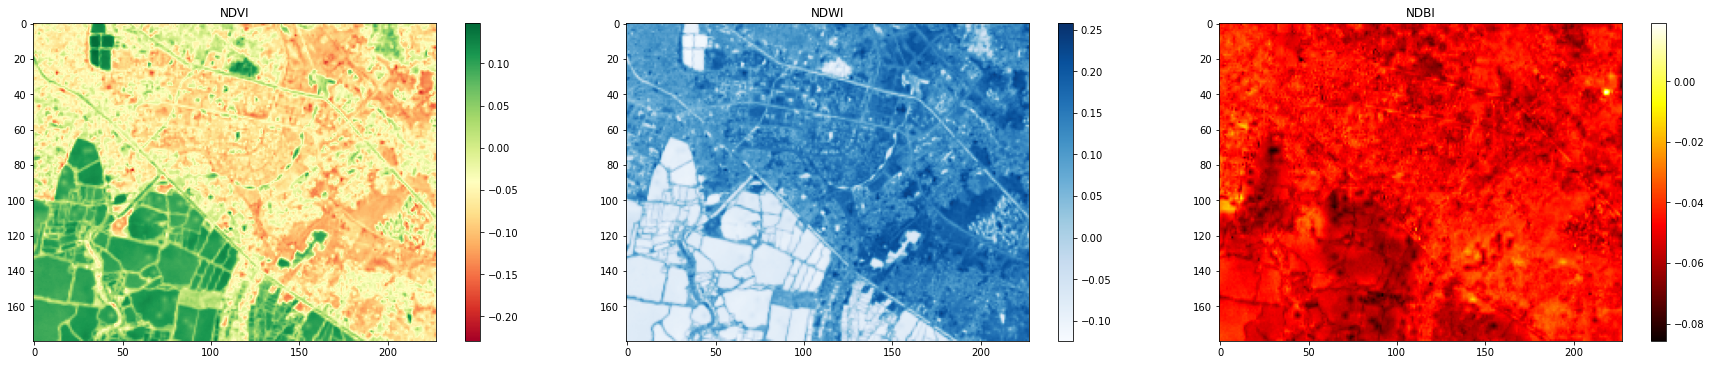

In [9]:
import spectral
from spectral import io
import matplotlib.pyplot as plt
import numpy as np

# Load the HDR image
img = io.envi.open('subset2.hdr')

# Extract the necessary bands from the image
red = img[:, :, 3].astype(float)
nir = img[:, :, 4].astype(float)
swir1 = img[:, :, 5].astype(float)
green = img[:, :, 2].astype(float)

# Calculate NDVI
ndvi = (nir - red) / (nir + red)

# Calculate NDWI
ndwi = (green - nir) / (green + nir)

# Calculate NDBI
ndbi = (swir1 - nir) / (swir1 + nir)

# Set the desired figure size
fig_size = (25, 5)

# Display the images
plt.figure(figsize=fig_size)

# NDVI
plt.subplot(1, 3, 1)
plt.imshow(ndvi, cmap='RdYlGn')
plt.title('NDVI')
plt.colorbar()

# NDWI
plt.subplot(1, 3, 2)
plt.imshow(ndwi, cmap='Blues')
plt.title('NDWI')
plt.colorbar()

# NDBI
plt.subplot(1, 3, 3)
plt.imshow(ndbi, cmap='RdYlBu')
plt.title('NDBI')
plt.colorbar()

plt.tight_layout()
plt.show()


In [1]:
import spectral
from spectral import io
import numpy as np
import rasterio

# Load the HDR image
img = io.envi.open('subset2.hdr')



In [35]:
# Extract the necessary bands from the image
red = img[:, :, 3].astype(float)
nir = img[:, :, 4].astype(float)
swir1 = img[:, :, 5].astype(float)
green = img[:, :, 2].astype(float)

# Calculate NDVI
ndvi = (nir - red) / (nir + red)

# Calculate NDWI
ndwi = (green - nir) / (green + nir)

# Calculate NDBI
ndbi = (swir1 - nir) / (swir1 + nir)

# Define output file paths
ndvi_path = 'ndvi.tif'
ndwi_path = 'ndwi.tif'
ndbi_path = 'ndbi.tif'


In [43]:
import imageio
# Normalize the index values to the range 0-255
ndvi_normalized = ((ndvi - np.min(ndvi)) / (np.max(ndvi) - np.min(ndvi))) * 255
ndwi_normalized = ((ndwi - np.min(ndwi)) / (np.max(ndwi) - np.min(ndwi))) * 255
ndbi_normalized = ((ndbi - np.min(ndbi)) / (np.max(ndbi) - np.min(ndbi))) * 255

# Convert the index arrays to uint8 data type
ndvi_uint8 = ndvi_normalized.astype(np.uint8)
ndwi_uint8 = ndwi_normalized.astype(np.uint8)
ndbi_uint8 = ndbi_normalized.astype(np.uint8)

# Save NDVI as TIFF
imageio.imwrite(ndvi_path, ndvi_uint8, format='tiff')

# Save NDWI as TIFF
imageio.imwrite(ndwi_path, ndwi_uint8, format='tiff')

# Save NDBI as TIFF
imageio.imwrite(ndbi_path, ndbi_uint8, format='tiff')

print('Images saved successfully.')

Images saved successfully.


In [3]:
import spectral
from spectral import io
import matplotlib.pyplot as plt
import numpy as np

# Load the HDR image
img = io.envi.open('subset3.hdr')



In [4]:
# Extract the necessary bands from the image
red = img[:, :, 3].astype(float)
nir = img[:, :, 4].astype(float)
swir1 = img[:, :, 5].astype(float)
green = img[:, :, 2].astype(float)

# Calculate NDVI
ndvi = (nir - red) / (nir + red)

# Calculate NDWI
ndwi = (green - nir) / (green + nir)

# Calculate NDBI
ndbi = (swir1 - nir) / (swir1 + nir)

# Define output file paths
ndvi_path = 'ndvi_2022.tif'
ndwi_path = 'ndwi_2022.tif'
ndbi_path = 'ndbi_2022.tif'


In [5]:
import imageio
# Normalize the index values to the range 0-255
ndvi_normalized = ((ndvi - np.min(ndvi)) / (np.max(ndvi) - np.min(ndvi))) * 255
ndwi_normalized = ((ndwi - np.min(ndwi)) / (np.max(ndwi) - np.min(ndwi))) * 255
ndbi_normalized = ((ndbi - np.min(ndbi)) / (np.max(ndbi) - np.min(ndbi))) * 255

# Convert the index arrays to uint8 data type
ndvi_uint8 = ndvi_normalized.astype(np.uint8)
ndwi_uint8 = ndwi_normalized.astype(np.uint8)
ndbi_uint8 = ndbi_normalized.astype(np.uint8)

# Save NDVI as TIFF
imageio.imwrite(ndvi_path, ndvi_uint8, format='tiff')

# Save NDWI as TIFF
imageio.imwrite(ndwi_path, ndwi_uint8, format='tiff')

# Save NDBI as TIFF
imageio.imwrite(ndbi_path, ndbi_uint8, format='tiff')

print('Images saved successfully.')

Images saved successfully.


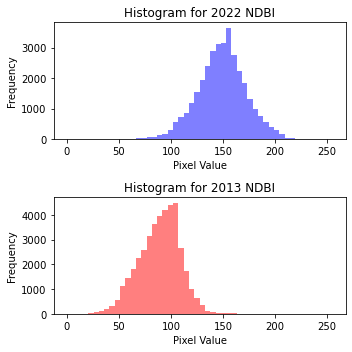

In [6]:
import matplotlib.pyplot as plt
import rasterio
import numpy as np

# Load the TIFF images using rasterio
image1 = rasterio.open('ndbi_2022.tif')
image2 = rasterio.open('ndbi.tif')

# Read the image data
data1 = image1.read(1, masked=False)
data2 = image2.read(1, masked=False)

# Flatten the image data arrays
flatten_data1 = data1.flatten()
flatten_data2 = data2.flatten()

# Remove NaN values
flatten_data1 = flatten_data1[~np.isnan(flatten_data1)]
flatten_data2 = flatten_data2[~np.isnan(flatten_data2)]

# Create a figure and axis for the histogram plots
fig, axs = plt.subplots(2, 1, figsize=(5, 5))

# Plot the histogram for image1
axs[0].hist(flatten_data1, bins=50, color='blue', alpha=0.5)
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram for 2022 NDBI')

# Plot the histogram for image2
axs[1].hist(flatten_data2, bins=50, color='red', alpha=0.5)
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram for 2013 NDBI')

# Adjust the layout
plt.tight_layout()

# Show the histograms
plt.show()
